<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB

Outliers for Price Before Handling:
        Unnamed: 0         Price         Location  Bedroom  Bathroom  Carport  \
47             65  9.700000e+09       Padalarang        6       5.0      2.0   
50             70  9.000000e+

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


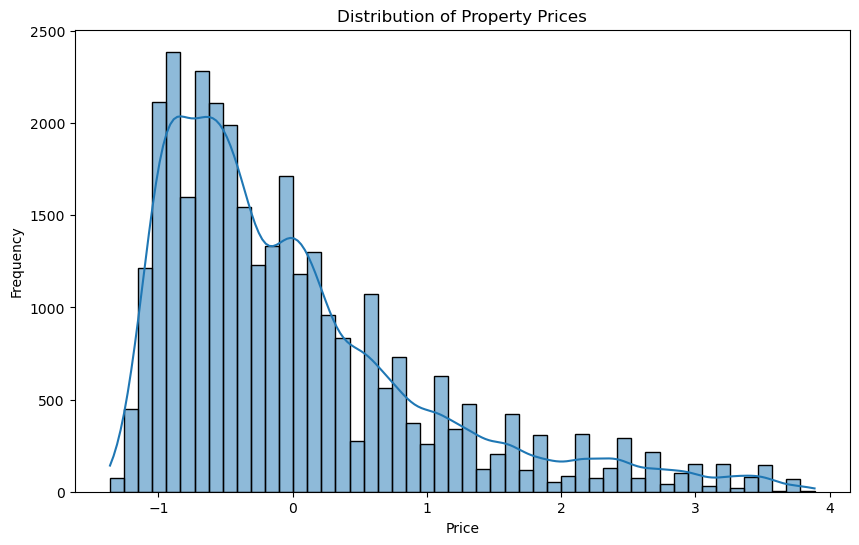

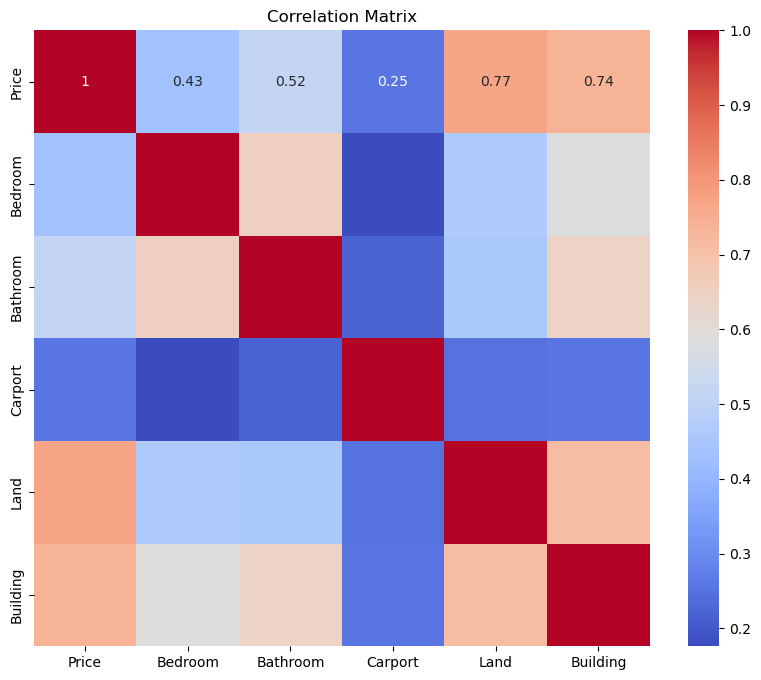

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

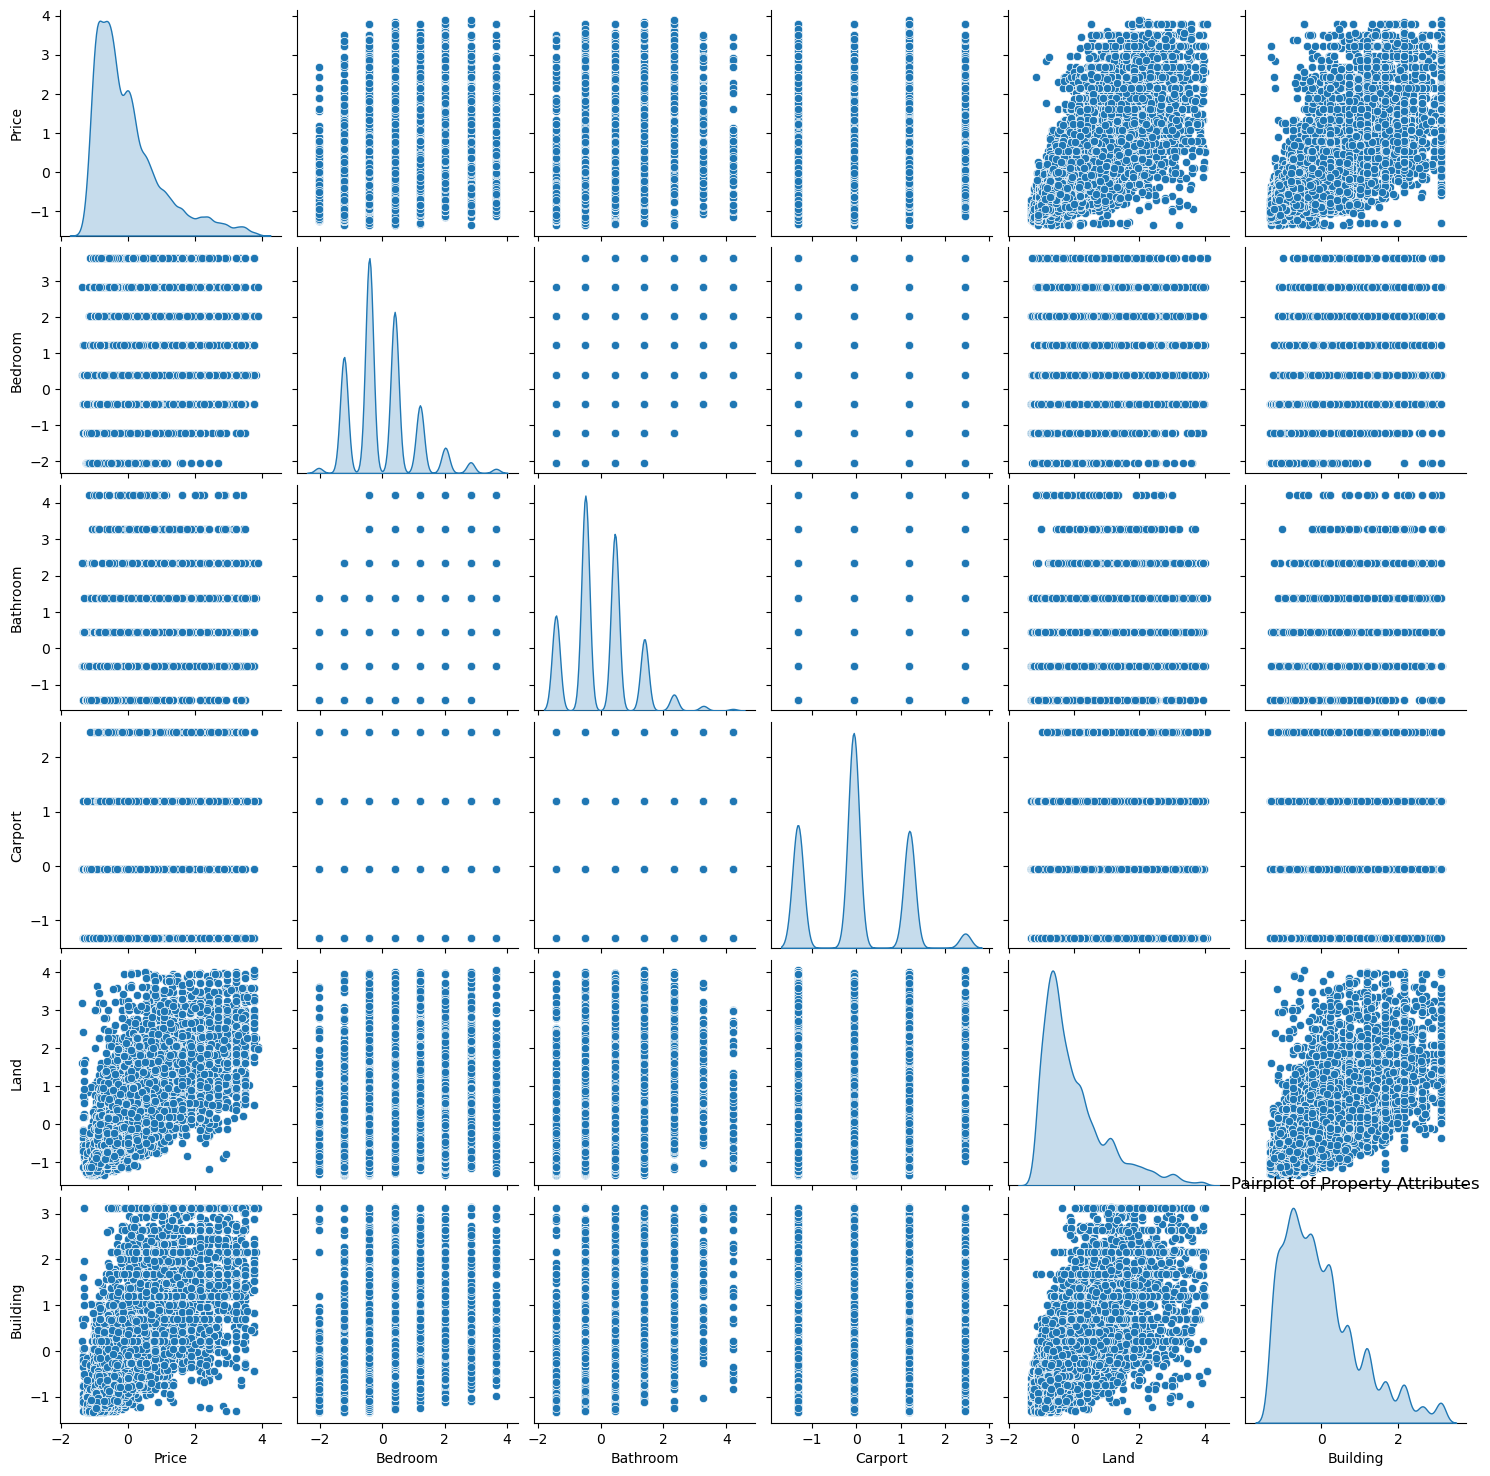

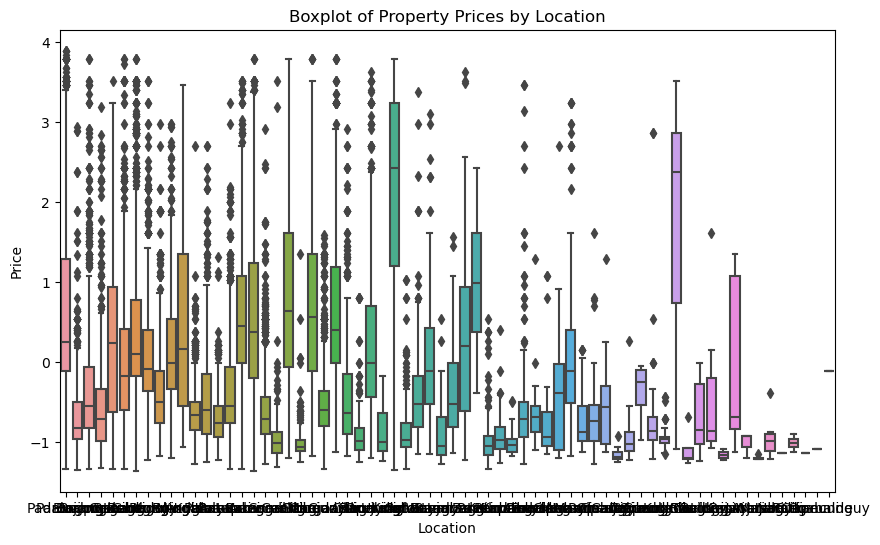

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32932\3572382052.py:116: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City/Regency', y='Price', data=df, ci=None)


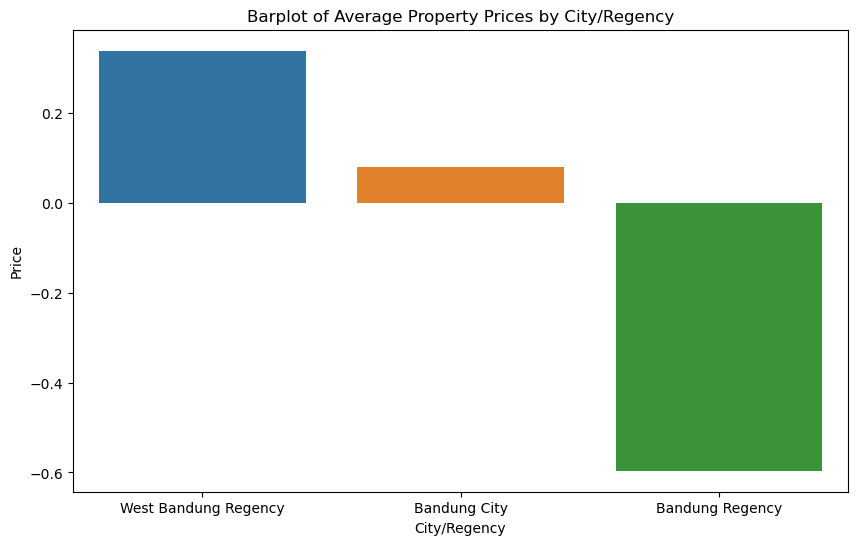

Mean Squared Error: 0.13


In [1]:

# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# load the dataset

# load the dataset using pd.read_excel with explicit encoding
df = pd.read_excel('dataset.xlsx')
df

df.head()

df.shape

df.info()

df.describe()

# checking missing values

df.isnull().sum()

# handling missing values
# Fill missing values for numerical columns with the median
for column in ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building',]:
   df[column] = df[column].fillna(df[column].median())

# Fill missing values for 'Location' and 'Month' with the mode (most frequent value)
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['Month'] = df['Month'].fillna(df['Month'].mode()[0])

# For 'City/Regency', fill missing values with the mode
df['City/Regency'] = df['City/Regency'].fillna(df['City/Regency'].mode()[0])


# For numerical columns, fill missing values with the median
for column in ['Latitude', 'Longitude']:
    df[column] = df[column].fillna(df[column].median())


df.isnull().sum()

# Drop rows with missing 'Price' as it is critical for analysis
df.dropna(subset=['Price'], inplace=True)

# Outlier Detection and Handling
# Using Z-score to identify outliers
from scipy import stats
columns_to_check = ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building']

#  Outlier Detection and Handling for Each Column
for column in columns_to_check:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[column]))

    # Identify outliers
    outliers = df[z_scores > 3]
    print(f"\nOutliers for {column} Before Handling:\n", outliers)

# Filter out outliers
df = df[(z_scores < 3)]

 #number of outliers removed
print(f"Number of Outliers Removed for {column}: {len(outliers)}")

#  Data After Handling Outliers
print("\nData After Handling Outliers:")
print(df.describe())

# scaling
# standerd scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df[columns_to_check] = scaler.fit_transform(df[columns_to_check])
print("\nData After Standard Scaling:")
df.describe()

# EDA

# Distribution of Property Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix
corr_matrix = df[columns_to_check].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[columns_to_check], diag_kind='kde')
plt.title('Pairplot of Property Attributes')
plt.show()

# Boxplot of Property Prices by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Boxplot of Property Prices by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

# Barplot of Average Property Prices by City/Regency
plt.figure(figsize=(10, 6))
sns.barplot(x='City/Regency', y='Price', data=df, ci=None)
plt.title('Barplot of Average Property Prices by City/Regency')
plt.xlabel('City/Regency')
plt.ylabel('Price')
plt.show()

# modelling

# Define x and y
feature_columns = ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Location', 'City/Regency']
X = df[feature_columns]
y = df['Price']
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Location', 'City/Regency'], drop_first=True)



# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using mutual information
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
feature_importances = mutual_info / mutual_info.max()

# Select top 10 features with highest mutual information
top_features = np.argsort(feature_importances)[-10:]
X_train_selected = X_train.iloc[:, top_features]
X_test_selected = X_test.iloc[:, top_features]

#  random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)



# Make predictions on the test set
y_pred = rf.predict(X_test_selected)

y_pred


# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")